In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_loss = pd.read_csv("/root/data/nanoGPT/wandb_export_2023-06-14T16_32_19.504-07_00.csv")
val_loss = pd.read_csv("/root/data/nanoGPT/wandb_export_2023-06-14T16_41_40.509-07_00.csv")
train_loss.columns, val_loss.columns

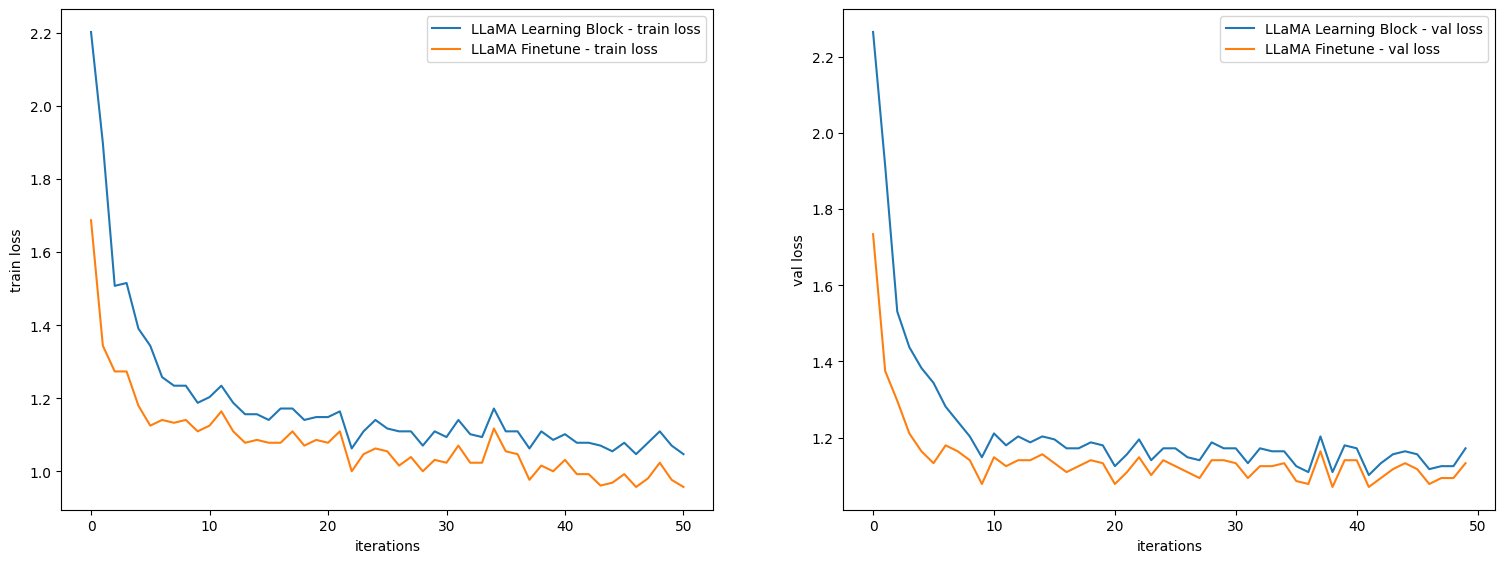

In [28]:
# plt.plot(train_loss['LLaMA Learning Block - train/loss'], label='LLaMA Learning Block - train loss')
# plt.plot(train_loss['LLaMA Finetune - train/loss'], label='LLaMA Finetune - train loss')

# plt.plot(val_loss['LLaMA Learning Block - val/loss'], label='LLaMA Learning Block - val loss')
# plt.plot(val_loss['LLaMA Finetune - val/loss'], label='LLaMA Finetune - val loss')

# plot above with 2 y-axes
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 6.5)

ax[0].plot(train_loss['LLaMA Learning Block - train/loss'], label='LLaMA Learning Block - train loss')
ax[0].plot(train_loss['LLaMA Finetune - train/loss'], label='LLaMA Finetune - train loss')
ax[0].set_xlabel('iterations')
ax[0].set_ylabel('train loss')
ax[0].legend()

ax[1].plot(val_loss['LLaMA Learning Block - val/loss'], label='LLaMA Learning Block - val loss')
ax[1].plot(val_loss['LLaMA Finetune - val/loss'], label='LLaMA Finetune - val loss')
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('val loss')
ax[1].legend()

## add legend
# plt.legend()
plt.show()

In [2]:
import wandb
import pandas as pd

# Read our CSV into a new DataFrame
new_iris_dataframe = pd.read_csv("/root/data/nanoGPT/wandb_export_2023-06-14T16_32_19.504-07_00.csv")

# Convert the DataFrame into a W&B Table
iris_table = wandb.Table(dataframe=new_iris_dataframe)

# Add the table to an Artifact to increase the row 
# limit to 200000 and make it easier to reuse
iris_table_artifact = wandb.Artifact(
    "iris_artifact", 
    type="dataset"
    )        
iris_table_artifact.add(iris_table, "iris_table")

# log the raw csv file within an artifact to preserve our data
iris_table_artifact.add_file("/root/data/nanoGPT/wandb_export_2023-06-14T16_32_19.504-07_00.csv")

# Start a W&B run to log data
run = wandb.init(project="Tables-Quickstart")

# Log the table to visualize with a run...
run.log({"iris": iris_table})

# and Log as an Artifact to increase the available row limit!
run.log_artifact(iris_table_artifact)

# Finish the run (useful in notebooks)
run.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
